# Recognizing Traffic Signals with Keras CNN

1. Importing the necessary libraries

In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import os
import warnings

warnings.filterwarnings("ignore")

2. Load and format the data

In [6]:
# We will time our model
start = time.time()

input_path = "C:/Users/dell/Documents/3-2/DP/Untitled Folder/"

image_data = []
image_labels = []

# Number of total classes
total_classes = 43

# Dimensions of our images
height = 32
width = 32
channels = 3

In [7]:
# Load the images from the correct path
for i in range(total_classes):
    path = input_path + "Train/" + str(i)
    images = os.listdir(path)
    
    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, "RGB")
            resize_image = image_fromarray.resize((height, width))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in Image loading")
            
# Converting lists into numpy arrays
image_data = np.array(image_data)
image_labels = np.array(image_labels)

# Time taken to load our images in seconds
end = time.time()
print("Time taken: ", round(end-start, 5), "seconds")

Error in Image loading
Time taken:  433.75588 seconds


3. Preprocessing the data

In [8]:
# Shuffling data
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)

image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [9]:
# Splitting training and testing dataset
X_train, X_valid, y_train, y_valid = train_test_split(image_data, image_labels, test_size=0.2,
                                                     random_state=2666, shuffle=True)

# Scale the values between 0 and 1
X_train = X_train / 255
X_valid = X_valid / 255

# The dimensions concur
print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)

X_train.shape (31366, 32, 32, 3)
X_valid.shape (7842, 32, 32, 3)
y_train.shape (31366,)
y_valid.shape (7842,)


In [10]:
# Converting the labels into one hot encoding
y_train = keras.utils.to_categorical(y_train, total_classes)
y_valid = keras.utils.to_categorical(y_valid, total_classes)

# The dimensions concur
print(y_train.shape)
print(y_valid.shape)

(31366, 43)
(7842, 43)


In [11]:
keras.backend.clear_session() # Clearing previous session if there was any
np.random.seed(2666)

In [12]:
# Create our model with Keras is straightforward
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=18, kernel_size=(5,5), strides=1, activation="relu", 
                        input_shape=(height, width, channels)),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(filters=36, kernel_size=(5,5), strides=1, activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(filters=36, kernel_size=(5, 5), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(1,1)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=72, activation="relu"),
    keras.layers.Dense(units=43, activation="softmax"),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 18)        1368      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 18)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 36)        16236     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 36)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 36)          32436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 36)                0

In [13]:
# Compilation of our model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

epochs = 5
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_valid, y_valid))
validation_data = (X_valid, y_valid)

Epoch 1/5
981/981 [==============================] - 40s 38ms/step - loss: 2.4707 - accuracy: 0.3233 - val_loss: 0.5108 - val_accuracy: 0.8483
Epoch 2/5
981/981 [==============================] - 37s 37ms/step - loss: 0.3965 - accuracy: 0.8912 - val_loss: 0.2614 - val_accuracy: 0.9237
Epoch 3/5
981/981 [==============================] - 35s 36ms/step - loss: 0.1940 - accuracy: 0.9469 - val_loss: 0.1539 - val_accuracy: 0.9600
Epoch 4/5
981/981 [==============================] - 35s 36ms/step - loss: 0.1301 - accuracy: 0.9653 - val_loss: 0.1170 - val_accuracy: 0.9680
Epoch 5/5
981/981 [==============================] - 36s 36ms/step - loss: 0.0850 - accuracy: 0.9780 - val_loss: 0.0941 - val_accuracy: 0.9756


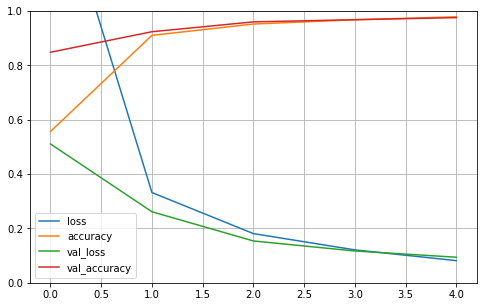

In [14]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

5. Validation of the model

In [15]:
# Testing accuracy on the reserved test set
test = pd.read_csv(input_path + "/Test.csv")

labels = test["ClassId"].values
test_imgs = test["Path"].values

(1, 32, 32, 3)
11


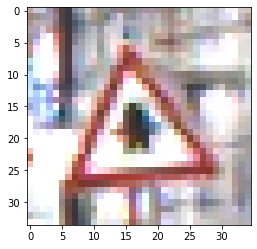

In [16]:
# How an image looks like
img_index = 25
image = Image.open(input_path + test_imgs[img_index])
img = image.resize((height,width))
img = np.array(img) / 255.
img = img.reshape(1, height, width, channels)

print(img.shape)
print(labels[img_index])
plt.imshow(image)

We don't know what that 11 of the class means. Let us map these values and predict this same image afterwards

In [17]:
# Dictionary to map classes.
classes = { 
    0:'Speed limit (20km/h)',
    1:'Speed limit (30km/h)', 
    2:'Speed limit (50km/h)', 
    3:'Speed limit (60km/h)', 
    4:'Speed limit (70km/h)', 
    5:'Speed limit (80km/h)', 
    6:'End of speed limit (80km/h)', 
    7:'Speed limit (100km/h)', 
    8:'Speed limit (120km/h)', 
    9:'No passing', 
    10:'No passing veh over 3.5 tons', 
    11:'Right-of-way at intersection', 
    12:'Priority road', 
    13:'Yield', 
    14:'Stop', 
    15:'No vehicles', 
    16:'Veh > 3.5 tons prohibited', 
    17:'No entry', 
    18:'General caution', 
    19:'Dangerous curve left', 
    20:'Dangerous curve right', 
    21:'Double curve', 
    22:'Bumpy road', 
    23:'Slippery road', 
    24:'Road narrows on the right', 
    25:'Road work', 
    26:'Traffic signals', 
    27:'Pedestrians', 
    28:'Children crossing', 
    29:'Bicycles crossing', 
    30:'Beware of ice/snow',
    31:'Wild animals crossing', 
    32:'End speed + passing limits', 
    33:'Turn right ahead', 
    34:'Turn left ahead', 
    35:'Ahead only', 
    36:'Go straight or right', 
    37:'Go straight or left', 
    38:'Keep right', 
    39:'Keep left', 
    40:'Roundabout mandatory', 
    41:'End of no passing', 
    42:'End no passing veh > 3.5 tons'
          }

In [18]:
# Prediction of this image
pred = model.predict_classes(img)[0]
print(pred)

sign = classes[pred]
print(sign)

11
Right-of-way at intersection


In [19]:
# Load and preprocess test set
start = time.time()
test = pd.read_csv(input_path + 'Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data = []

for img in imgs:
    try:
        image = cv2.imread(input_path + img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((height, width))
        data.append(np.array(resize_image))
    except:
        print("Error")
        
X_test = np.array(data)
X_test = X_test / 255

In [20]:
# Prediction of test set
pred = model.predict_classes(X_test)

#Accuracy with the test data
print(accuracy_score(labels, pred))
end = time.time()
print("Time taken: ", round(end-start,5), "seconds")

0.9027711797307997
Time taken:  292.41379 seconds
